# Let's Grow More Data Science Virtual Internship Program May 2023

# LGMVIP MAY 2023

## BY: T. J. Prakruthi

### ADVANCED LEVEL TASK

## TASK 7: Develop A Neural Network That Can Read Handwriting

Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

### Dataset Link: https://en.wikipedia.org/wiki/MNIST_database

### Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

### Displaying some images from the dataset

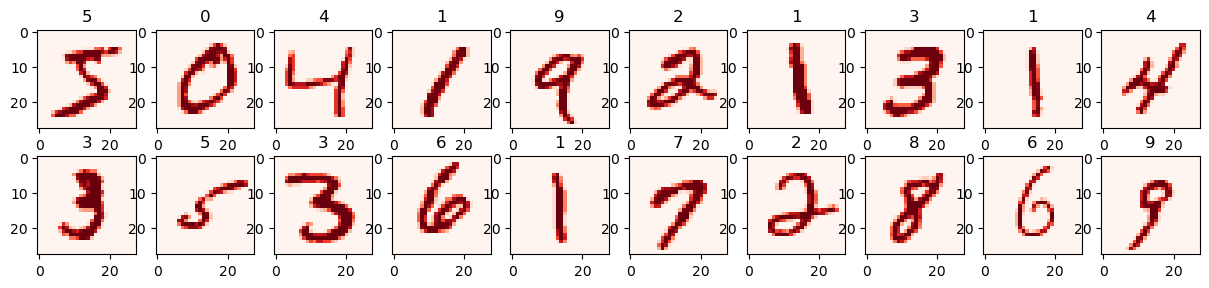

In [3]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
    ax=fig.add_subplot(2,10,i+1)
    ax.imshow(np.squeeze(x_train[i]),cmap='Reds')
    ax.set_title(y_train[i])

### Preprocessing the dataset

In [4]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## Creating the model
## Model Architecture
We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

1. Conv2D - for the convolution layers
2. Dropout - to prevent overfitting
3. Dense - a fully connected layer
4. Softmax activation - This is used to convert all predictions into probability
The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [8]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

### Training the model

In [10]:
# Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 361s 213ms/step - loss: 0.2608 - accuracy: 0.9240 - val_loss: 0.0694 - val_accuracy: 0.9838
Epoch 2/10
1688/1688 [==============================] - 357s 211ms/step - loss: 0.1154 - accuracy: 0.9671 - val_loss: 0.0832 - val_accuracy: 0.9843
Epoch 3/10
1688/1688 [==============================] - 425s 252ms/step - loss: 0.0877 - accuracy: 0.9742 - val_loss: 0.1416 - val_accuracy: 0.9768
Epoch 4/10
1688/1688 [==============================] - 380s 225ms/step - loss: 0.0736 - accuracy: 0.9787 - val_loss: 0.0953 - val_accuracy: 0.9837
Epoch 5/10
1688/1688 [==============================] - 391s 232ms/step - loss: 0.0676 - accuracy: 0.9801 - val_loss: 0.1552 - val_accuracy: 0.9770
Epoch 6/10
1688/1688 [==============================] - 498s 295ms/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.1379 - val_accuracy: 0.9802
Epoch 7/10
1688/1688 [==============================] - 519s 307ms/step - loss: 0.0496 - accuracy: 0.9856 - val_

### Saving and loading the model

In [11]:
model.save('MNproject.h5')

In [12]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

### Evaluating the model

In [13]:
# Evaluate the model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 16s 49ms/step - loss: 2.7498 - accuracy: 0.9884
Test Loss 2.749802827835083
Test Accuracy 0.9883999824523926


### Plotting Training & Validation plots

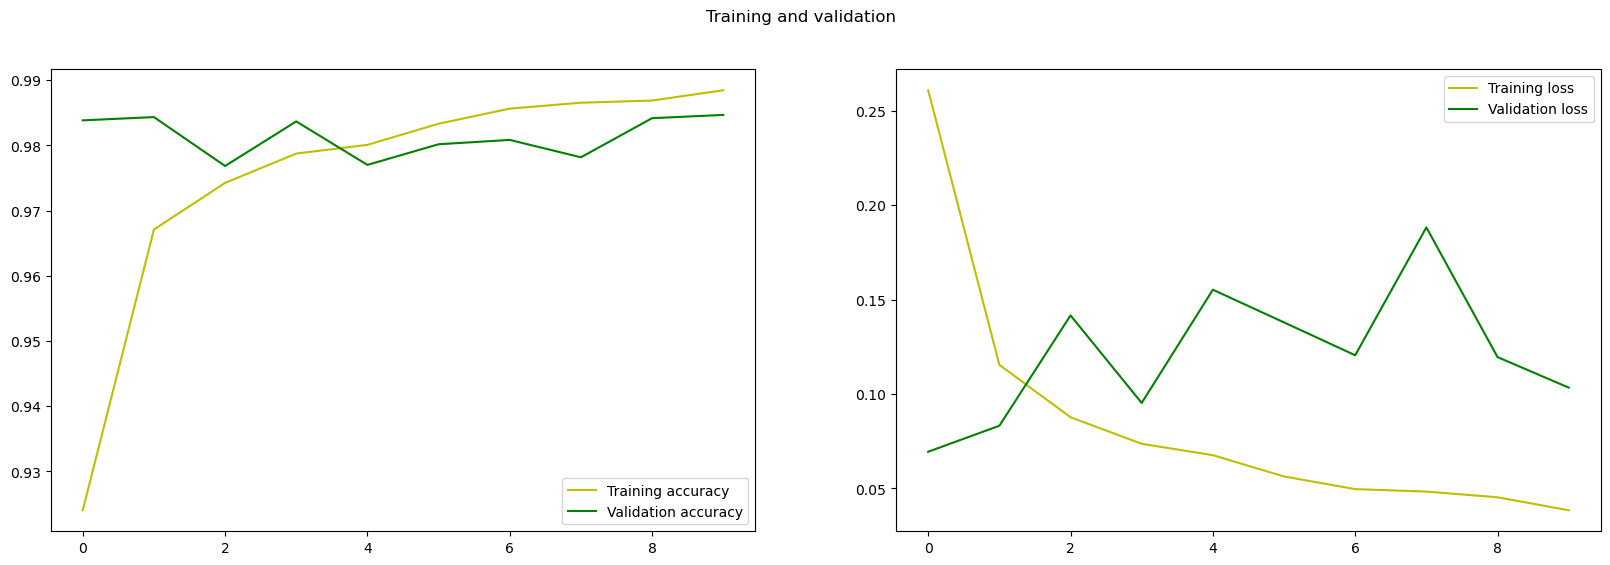

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [15]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 17s 51ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1114,    5,    0,    5,    2,    5,    2,    2,    0],
       [   1,    0, 1029,    0,    1,    0,    0,    1,    0,    0],
       [   0,    0,    1, 1000,    0,    5,    0,    2,    2,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    0,    2],
       [   2,    0,    0,    6,    0,  878,    6,    0,    0,    0],
       [   2,    0,    1,    0,    1,    1,  953,    0,    0,    0],
       [   0,    1,    7,    0,    6,    0,    0, 1010,    1,    3],
       [   1,    0,    4,    2,    2,    0,    3,    1,  958,    3],
       [   1,    0,    0,    0,   13,    3,    0,    0,    5,  987]])>

### Plotting the heat map

Text(95.72222222222221, 0.5, 'Truth')

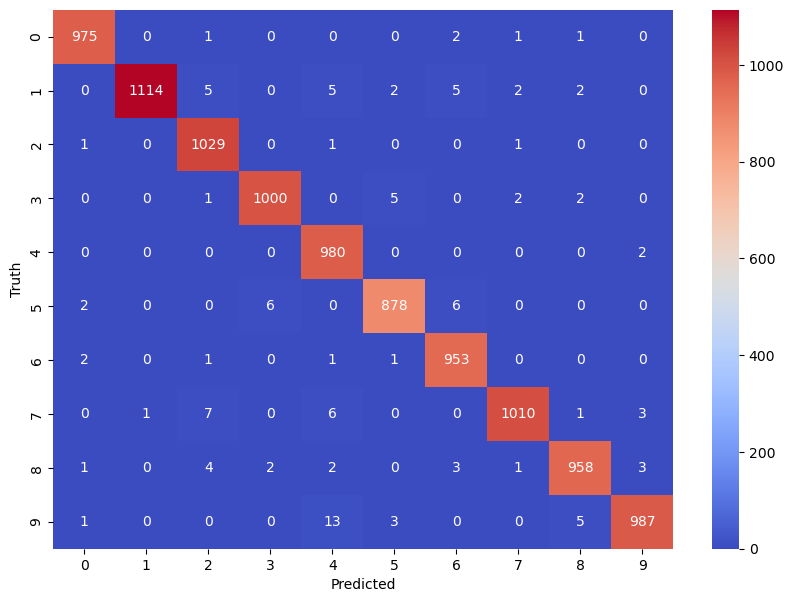

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Testing the model

313/313 [==============================] - 16s 51ms/step
Predicted Value:  9
Successful prediction


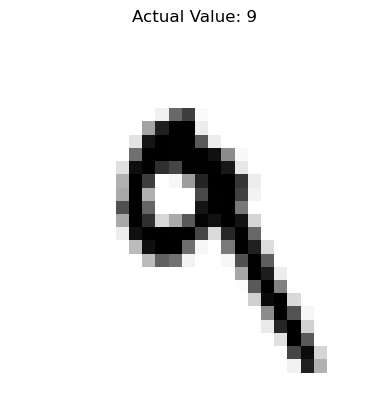

In [17]:
# Testing the Model
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
    print('Successful prediction')
else:
    print('Unsuccessful prediction')

313/313 [==============================] - 16s 51ms/step
Predicted Value:  2
Successful prediction


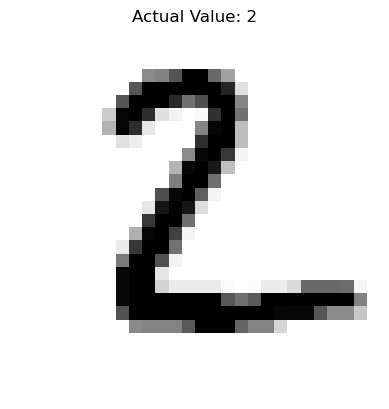

In [18]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
    print('Successful prediction')
else:
    print('Unsuccessful prediction')

## THANK YOU!!